# ***SVM***
---

In [ ]:
### Summary
"""
1. Data Preprocessing
    SVM is used primarily for continuous variables, however, we have a few categorical variables in our dataset and 
    are going to use one hot encoding to categorical variables for model classification

2. Data scailing
    SVM is sensitive model that it can be seriously affected by outliers and deviations, 
    we are going to use Standard scaling method to avoid misclassifcation

3. Model selection
    We will use 2 methods. One is linear classification and the other is polynomial features of classification. 
    Compared both accuracy and higher accuracy will be selected 

4. Hyperparameter
    To enhance the generalization of classification of dataset, we will use soft margin mehotd, 
    so the hyperparameter "C" will be manipulated as low as possible. 
"""

### ***EDA***

In [ ]:
### Import data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://docs.google.com/spreadsheets/d/1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX/edit?usp=sharing&ouid=117953154631179589875&rtpof=true&sd=true
id = "1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('speed_dating.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel('speed_dating.xlsx')
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose feature base on domain knowledge 
XY = df[['dec', 'dec_o', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', "match"]]
XY.head()

,dec,dec_o,gender,round,position,order,int_corr,samerace,age_o,race_o,...,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,1,0,0,10,7,4,0.14,0,27.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
1,1,0,0,10,7,3,0.54,0,22.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
2,1,1,0,10,7,10,0.16,1,22.0,4.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
3,1,1,0,10,7,5,0.61,0,23.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
4,1,1,0,10,7,7,0.21,0,24.0,3.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# drop columns with too much null numbers
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
#XYdrop = XYdrop.drop(['from'], axis = 1) #process later
XYdrop.shape[0]

8378

In [ ]:
# drop rows with null numbers
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull.reset_index(inplace=True, drop=True)
XYdrop.shape[0]
XYdrop_nonull.shape[1]

61

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("yrs")
stopwords.append(" ")
stopwords.append("P")
stopwords.append("R")
stopwords.append(".")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])
#XY['from'].unique()

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
XYdrop_nonull['from'][90:100] = "california"

for i in range(XYdrop_nonull.shape[0]):
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['from'][i]))

<ipython-input-9-3c62503db0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][90:100] = "california"
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-9-3c62503db0fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['from'

In [ ]:
X = XYdrop_nonull.drop(['dec', 'dec_o', "match"], axis=1)
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
X.head()

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,0,10,7,4,0.14,0,27.0,2.0,35.0,20.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
1,0,10,7,3,0.54,0,22.0,2.0,60.0,0.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
2,0,10,7,10,0.16,1,22.0,4.0,19.0,18.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
3,0,10,7,5,0.61,0,23.0,2.0,30.0,5.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
4,0,10,7,7,0.21,0,24.0,3.0,30.0,10.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0


In [ ]:
XYdrop_nonull.head()

,dec,dec_o,gender,round,position,order,int_corr,samerace,age_o,race_o,...,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,match
0,1,0,0,10,7,4,0.14,0,27.0,2.0,...,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0
1,1,0,0,10,7,3,0.54,0,22.0,2.0,...,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0
2,1,1,0,10,7,10,0.16,1,22.0,4.0,...,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1
3,1,1,0,10,7,5,0.61,0,23.0,2.0,...,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1
4,1,1,0,10,7,7,0.21,0,24.0,3.0,...,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1


In [ ]:
y = XYdrop_nonull[["match"]]
y.head()

,match
0,0
1,0
2,1
3,1
4,1


In [ ]:
# split dataset
from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 99) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 6419 observation with 58 features
test data has 1605 observation with 58 features


In [ ]:
# One hot encoding
# another way: get_dummies

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)



In [ ]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

categories = ['from']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
1054,-0.988691,0.250923,0.526971,1.471514,1.021564,-0.816338,0.171707,-0.611343,-0.194056,-0.347240,...,1.683787,-0.717661,-0.530145,-0.254299,2.116854,-1.492972,0.500135,0.815184,-3.161307,-1.444402
1829,-0.988691,-0.214657,-0.920994,-0.736015,-1.353536,1.224983,-1.233067,-0.611343,-0.324013,0.130036,...,0.002564,0.180143,0.231384,0.227201,0.948631,0.649684,-0.203739,0.179226,-0.379108,0.236152
2143,1.011438,-0.214657,-0.559003,-0.736015,0.955589,-0.816338,0.452662,-0.611343,-0.628573,-0.154630,...,0.274844,0.125241,-0.496638,0.814254,0.534413,-0.064535,-0.907613,-0.456733,-1.306508,-0.324033
4489,-0.988691,-0.680237,0.164980,0.735671,0.460777,-0.816338,1.576481,-0.611343,-0.194056,0.360885,...,-0.477168,0.897094,0.231384,-0.254299,-0.310202,-1.492972,-0.203739,-0.456733,-0.379108,0.236152
7465,-0.988691,1.182083,0.345975,-0.368093,-0.297936,1.224983,-0.952113,1.010231,-0.592695,1.069009,...,-0.477168,0.089717,0.231384,-0.254299,-0.310202,-1.492972,0.500135,-0.456733,-0.379108,-0.324033


In [ ]:
y_train.head()

,match
1054,0
1829,0
2143,0
4489,0
7465,0


### ***SVM Linear***

In [ ]:
### SVM modeling 
import sklearn.svm as svm 
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# Linear SVM
svm_clf = svm.SVC(kernel="linear", probability=True)
svm_clf.fit(X_train, y_train) 

# Score
scores = cross_val_score(svm_clf, X_test, y_test, cv=5)
scores = pd.DataFrame(scores)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
svm_clf = svm.SVC(kernel="linear", probability=True)

In [ ]:
print(pd.DataFrame(cross_validate(svm_clf, X_test, y_test, cv=5)))
print("Cross validation average: ", scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

     fit_time  score_time  test_score
0  184.346450    0.009682    0.834891
1  166.958788    0.009681    0.834891
2  239.212294    0.009533    0.834891
3  148.712498    0.009755    0.834891
4  137.042827    0.010854    0.834891
Cross validation average:  0    0.834891
dtype: float64


In [ ]:
y_test_pred = svm_clf.predict(X_test)
y_train_pred = svm_clf.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8351768188191308
Accuracy: 0.8348909657320872


In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

probas_ = svm_clf.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f" %roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve: 0.580600


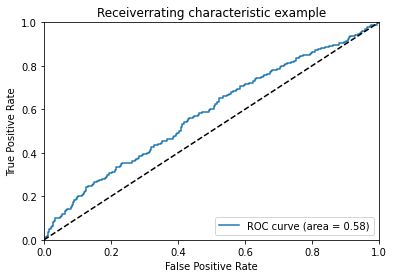

In [ ]:
import pylab as pl 

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### ***Polynomial svm (Untunning Hyperparameters)***

In [ ]:
### Tuning Hyperparameters

# Poly_kernel 
poly_kernel_svm_clf = svm.SVC(kernel="poly", degree=3, coef0=1)

poly_kernel_svm_clf.fit(X_train, y_train)
poly_scores = cross_val_score(poly_kernel_svm_clf, X_test, y_test, cv=5)

# Score
poly_cross_scores = pd.DataFrame(cross_validate(poly_kernel_svm_clf, X_test, y_test, cv=5))
print(poly_cross_scores)
print("Cross validation average: ", poly_cross_scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

   fit_time  score_time  test_score
0  0.166664    0.012212    0.834891
1  0.189773    0.012980    0.834891
2  0.164461    0.012375    0.834891
3  0.180899    0.012592    0.834891
4  0.153843    0.012957    0.834891
Cross validation average:  fit_time      0.171128
score_time    0.012623
test_score    0.834891
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Poly_kernel ROC curve 
from sklearn.metrics import roc_curve, auc

# poly kernel
poly_kernel_svm_clf = svm.SVC(kernel="poly", degree=3, coef0=1, probability=True)

# roc curve
poly_probas_ = poly_kernel_svm_clf.fit(X_train, y_train).predict_proba(X_test)
p_fpr, p_tpr, p_thresholds = roc_curve(y_test, poly_probas_[:, 1])
poly_roc_auc = auc(p_fpr, p_tpr)
print("Area under the ROC curve: %f" %poly_roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve: 0.645514


In [ ]:
# Poly_kernel ROC curve 
from sklearn.metrics import roc_curve, auc

# roc curve
poly_probas_ = poly_kernel_svm_clf.fit(X_train, y_train).predict_proba(X_test)
p_fpr, p_tpr, p_thresholds = roc_curve(y_test, poly_probas_[:, 1])
poly_roc_auc = auc(p_fpr, p_tpr)
print("Area under the ROC curve: %f" %poly_roc_auc)

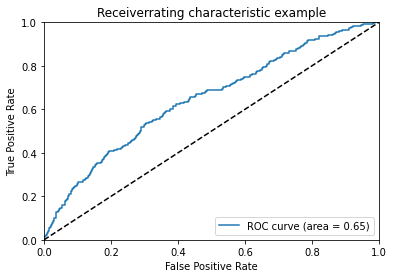

In [ ]:
# Plot ROC curve
pl.clf()
pl.plot(p_fpr, p_tpr, label='ROC curve (area = %0.2f)' % poly_roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### ***RBF svm***

In [ ]:
# RBF_SVM
rbf_svm_clf = svm.SVC(kernel="rbf", degree=3, gamma=5, probability=True)
rbf_svm_clf.fit(X_train, y_train)
rbf_scores = cross_val_score(rbf_svm_clf, X_test, y_test, cv=5)

rbf_cross_scores = pd.DataFrame(cross_validate(rbf_svm_clf, X_test, y_test, cv=5))
print(rbf_cross_scores)
print("Cross validation average: ", rbf_cross_scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

   fit_time  score_time  test_score
0  0.780749    0.042650    0.834891
1  0.770220    0.045628    0.834891
2  0.770120    0.041755    0.834891
3  0.805840    0.040852    0.834891
4  0.760914    0.044128    0.834891
Cross validation average:  fit_time      0.777569
score_time    0.043003
test_score    0.834891
dtype: float64


In [ ]:
# RBF_svm ROC curve 
from sklearn.metrics import roc_curve, auc

# rbf kernel
rbf_svm_clf = svm.SVC(kernel="rbf", degree=3, gamma=5, probability=True)

# roc curve
rbf_probas_ = rbf_svm_clf.fit(X_train, y_train).predict_proba(X_test)
r_fpr, r_tpr, thresholds = roc_curve(y_test, rbf_probas_[:, 1])
rbf_roc_auc = auc(r_fpr, r_tpr)
print("Area under the ROC curve: %f" %rbf_roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve: 0.498881


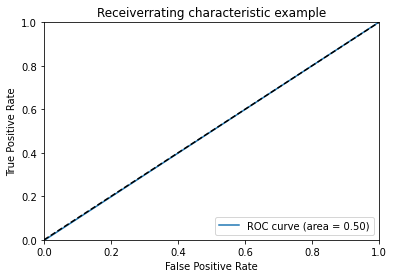

In [ ]:
# Plot ROC curve
pl.clf()
pl.plot(r_fpr, r_tpr, label='ROC curve (area = %0.2f)' % rbf_roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### ***SVM Gridsearch***

In [ ]:
### Tunning hyperparameters 
"""
C(cost): {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}
degree: 3
coef0: For constant value, used for polynomial SVM
"""
from sklearn.model_selection import GridsearchCV

svm_clf = 

### ***Polynomial svm (Tunning Hyperparameters)***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# polynomial svm
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), 
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X_train, y_train)

# score
polynomial_cross_scores = pd.DataFrame(cross_validate(polynomial_svm_clf, X_test, y_test, cv=5))
print(polynomial_cross_scores)
print("Cross validation average: ", polynomial_cross_scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array wa

     fit_time  score_time  test_score
0  118.716502    0.106094    0.688474
1  118.357538    0.097110    0.791277
2  117.265527    0.101155    0.732087
3  115.086143    0.103751    0.753894
4  117.010988    0.094620    0.644860
Cross validation average:  fit_time      117.287339
score_time      0.100546
test_score      0.722118
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### ***Precision Recall curve***

In [ ]:
### SVM modeling 
import sklearn.svm as svm 
import sklearn.metrics as mt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc, plot_precision_recall_curve, precision_recall_curve


### Tuning Hyperparameters

# Poly_kernel 
poly_kernel_svm_clf = svm.SVC(kernel="poly", degree=5, coef0=0, probability=True)
# poly_kernel_svm_clf.fit(X_train, y_train)

# get proba
poly_probas_ = poly_kernel_svm_clf.fit(X_train, y_train).predict_proba(X_test)
y_prob = poly_probas_[:, 1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18693665686710245


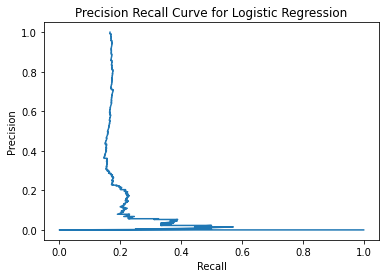

In [ ]:
# precision curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# plot
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)
plt.plot(precision, recall)

plt.title('Precision Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

### ***Imbalancing data***

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_excel('speed_dating.xlsx')

In [ ]:
# Get target variable
y = df['match']
print(y)

0       0
1       0
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64


In [ ]:
# Get filtered variables for classifier 
XY = df[['match', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]


# Get feature space by dropping useless feature
# to_drop = ['RowNumber','CustomerId','Surname','Exited']
# X = churn_df.drop(to_drop, axis=1)

In [ ]:
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
XYdrop = XYdrop.drop(['from'], axis = 1) #process later
print(XYdrop.isnull().sum().to_string())

match         0
gender        0
round         0
position      0
order         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
age          95
field_cd     82
race         63
imprace      79
imprelig     79
goal         79
date         97
go_out       79
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1      79
intel2_1     79
fun2_1       79
amb2_1       89
shar2_1      89
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
amb3_1      105


In [ ]:
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull

,match,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,0,0,10,7,4,0.14,0,27.0,2.0,35.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
1,0,0,10,7,3,0.54,0,22.0,2.0,60.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
2,1,0,10,7,10,0.16,1,22.0,4.0,19.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
3,1,0,10,7,5,0.61,0,23.0,2.0,30.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
4,1,0,10,7,7,0.21,0,24.0,3.0,30.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,0,1,22,17,8,0.28,1,24.0,2.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8373,0,1,22,14,5,0.64,0,26.0,3.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8374,0,1,22,13,4,0.71,0,24.0,6.0,50.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8376,0,1,22,3,16,0.62,0,22.0,4.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0


In [ ]:
X = XYdrop_nonull.drop(['match'], axis=1)

cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
Y = XYdrop_nonull['match']
Y

0       0
1       0
2       1
3       1
4       1
       ..
8372    0
8373    0
8374    0
8376    0
8377    0
Name: match, Length: 8024, dtype: int64

In [ ]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, stratify = Y) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

sum(y_train)

training data has 6018 observation with 57 features
test data has 2006 observation with 57 features


992

In [ ]:

### Tuning Hyperparameters

# Poly_kernel 
poly_kernel_svm_clf = svm.SVC(kernel="poly", degree=5, coef0=0, probability=True)
# poly_kernel_svm_clf.fit(X_train, y_train)

# get proba
poly_probas_ = poly_kernel_svm_clf.fit(X_train, y_train).predict_proba(X_test)
y_prob = poly_probas_[:, 1]

0.23666741168684963


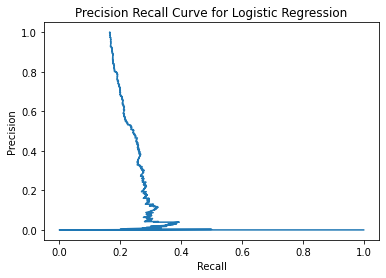

In [ ]:
# precision curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# plot
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)
plt.plot(precision, recall)

plt.title('Precision Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

### ***4 labels***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel('speed_dating.xlsx')
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose feature base on domain knowledge 
XY = df[['dec', 'dec_o', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]

In [ ]:
# drop columns with too much null numbers
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
#XYdrop = XYdrop.drop(['from'], axis = 1) #process later
XYdrop.shape[0]

8378

In [ ]:
# drop rows with null numbers
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull.reset_index(inplace=True, drop=True)
XYdrop.shape[0]
XYdrop_nonull.shape[1]

60

In [ ]:
XYdrop_nonull['from'].unique()

array(['Chicago', 'Alabama', 'Connecticut', 'Texas', 'Bowdoin College',
       'MD', 'Southern California', 'London, England',
       'Palm Springs, California', 94115, 'Argentina', 'England',
       'Cincinnati, Ohio', 'Miami', 'Milan - Italy', 'Georgia, USA',
       'New York', 'california', 'Washington DC', 'New Jersey',
       'Ann Arbor, MI', 'Hong Kong', 'new york', 'Iowa', 'California',
       'Westchester, NY', 'Washington, DC', 'Boston', 'new jersey',
       'Michigan', 'SIngapore', 'Brazil', 'Brandeis University',
       'Cincinnati, OH', 'Los Angeles', 'China',
       'San Francisco(home)/Los Angeles(undergrad)', 'Spain', 'Israel',
       'Switzerland', 'Italy', 'Philadelphia', 'Houston', 'Brooklyn',
       'Florida', 'Tuscaloosa, Alabama', 'Albuquerque, NM',
       'Palo Alto, California', 'Boston, MA', 'Mexico', 'Torrance, CA',
       'St. Louis, MO', 'London, UK', 'Minnesota', 'Ohio',
       'India/Venezuela', 'Washington State', 'Panama', 'spain',
       'Arizona', 'Minn

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("yrs")
stopwords.append(" ")
stopwords.append("P")
stopwords.append("R")
stopwords.append(".")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])
#XY['from'].unique()

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
XYdrop_nonull['from'][90:100] = "california"

for i in range(XYdrop_nonull.shape[0]):
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['from'][i]))

<ipython-input-59-3c62503db0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][90:100] = "california"
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-59-3c62503db0fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['fro

In [ ]:
tokenization_and_stemming("I am from NYC")

['nyc']

In [ ]:
XYdrop_nonull['from'].nunique()

228

In [ ]:
XYdrop_nonull['from'].unique()

array(['chicago', 'alabama', 'connecticut', 'texa', 'bowdoincolleg', 'md',
       'southerncalifornia', 'londonengland', 'palmspringcalifornia',
       'california', 'argentina', 'england', 'cincinnatiohio', 'miami',
       'milanitali', 'georgiausa', 'newyork', 'washingtondc', 'newjersey',
       'annarbormi', 'hongkong', 'iowa', 'westchestny', 'boston',
       'michigan', 'singapor', 'brazil', 'brandeiunivers', 'cincinnatioh',
       'losangel', 'china', 'sanfranciscohomeangelundergrad', 'spain',
       'israel', 'switzerland', 'itali', 'philadelphia', 'houston',
       'brooklyn', 'florida', 'tuscaloosaalabama', 'albuquerqunm',
       'paloaltocalifornia', 'mexico', 'torrancca', 'louimo', 'londonuk',
       'minnesota', 'ohio', '', 'washingtonstate', 'panama', 'arizona',
       'minneapolimn', 'nj', 'ny', 'sanfrancisco', 'bangladesh',
       'longisland', 'brooklynny', 'india', 'canada', 'colorado',
       'annarbor', 'philippin', 'milwaukewisconsin', 'franc',
       'longislandny',

In [ ]:
X = XYdrop_nonull.drop(['dec', 'dec_o'], axis=1)
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
Y = XYdrop_nonull[['dec','dec_o']]
Y = Y['dec']*2 + Y['dec_o']*1
Y.unique()
Y

0       2
1       2
2       3
3       3
4       3
       ..
8019    0
8020    1
8021    0
8022    1
8023    1
Length: 8024, dtype: int64

In [ ]:
# Change values 
Y = Y.replace([2, 1], 0)
Y = Y.replace(3, 1)
Y

0       0
1       0
2       1
3       1
4       1
       ..
8019    0
8020    0
8021    0
8022    0
8023    0
Length: 8024, dtype: int64

In [ ]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 99) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 6419 observation with 58 features
test data has 1605 observation with 58 features


In [ ]:
# One hot encoding
# another way: get_dummies

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

'''
categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)
'''

"\ncategories = ['Geography']\nenc_ohe = OneHotEncoder()\nenc_ohe.fit(X_train[categories])\n\nX_train = OneHotEncoding(X_train, enc_ohe, categories)\nX_test = OneHotEncoding(X_test, enc_ohe, categories)\n"

In [ ]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

categories = ['from']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
1054,-0.988691,0.250923,0.526971,1.471514,1.021564,-0.816338,0.171707,-0.611343,-0.194056,-0.347240,...,1.683787,-0.717661,-0.530145,-0.254299,2.116854,-1.492972,0.500135,0.815184,-3.161307,-1.444402
1829,-0.988691,-0.214657,-0.920994,-0.736015,-1.353536,1.224983,-1.233067,-0.611343,-0.324013,0.130036,...,0.002564,0.180143,0.231384,0.227201,0.948631,0.649684,-0.203739,0.179226,-0.379108,0.236152
2143,1.011438,-0.214657,-0.559003,-0.736015,0.955589,-0.816338,0.452662,-0.611343,-0.628573,-0.154630,...,0.274844,0.125241,-0.496638,0.814254,0.534413,-0.064535,-0.907613,-0.456733,-1.306508,-0.324033
4489,-0.988691,-0.680237,0.164980,0.735671,0.460777,-0.816338,1.576481,-0.611343,-0.194056,0.360885,...,-0.477168,0.897094,0.231384,-0.254299,-0.310202,-1.492972,-0.203739,-0.456733,-0.379108,0.236152
7465,-0.988691,1.182083,0.345975,-0.368093,-0.297936,1.224983,-0.952113,1.010231,-0.592695,1.069009,...,-0.477168,0.089717,0.231384,-0.254299,-0.310202,-1.492972,0.500135,-0.456733,-0.379108,-0.324033


In [ ]:

### Tuning Hyperparameters

# Poly_kernel 
poly_kernel_svm_clf = svm.SVC(kernel="poly", degree=5, coef0=0, probability=True)
# poly_kernel_svm_clf.fit(X_train, y_train)

# get proba
poly_probas_ = poly_kernel_svm_clf.fit(X_train, y_train).predict_proba(X_test)
y_prob = poly_probas_[:, 1]

0.18693665686710245


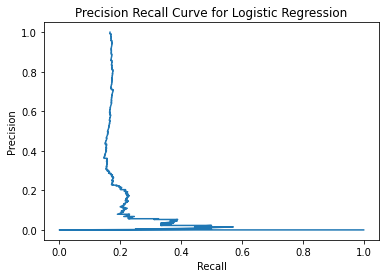

In [ ]:
# precision curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# plot
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)
plt.plot(precision, recall)

plt.title('Precision Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [ ]:
# MLP를 활용한 Classifier 

import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)

# Data Copy 
X_train_ann = X_train.copy()
y_train_ann = y_train.copy()


# 기본적인 Sequential 모델 작성
  # 입력층 1, 은닉층 3, 출력층 (Logistic 이진분류)
mlp_clf = keras.models.Sequential()
inputs = keras.layers.Input(shape=(58,))
hidden_1 = keras.layers.Dense(500, activation="relu")(inputs)
hidden_2 = keras.layers.Dense(300, activation="relu")(hidden_1)
hidden_3 = keras.layers.Dense(100, activation="relu")(hidden_2)
outputs = keras.layers.Dense(1, name="output", activation="sigmoid")(hidden_3)
mlp_seq_model = keras.Model(inputs=inputs, outputs=outputs)

# MLP Callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("aSSIST_Thesis_model", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

# Model Summary
mlp_seq_model.summary()

# Model Complie
  # 손실함수, 경사하강법, Accuracy 지정
mlp_seq_model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Model Fitting
mlp_clf_history = mlp_seq_model.fit(X_train_ann, y_train, epochs=200, callbacks=[checkpoint_cb, early_stopping_cb])

# Accuracy measurement
mlp_clf_history.history

# mlp_clf Loss, Accuracy check
pd.DataFrame(mlp_clf_history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

tf version:  2.9.2
keras version:  2.9.0
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 58)]              0         
                                                                 
 dense_12 (Dense)            (None, 500)               29500     
                                                                 
 dense_13 (Dense)            (None, 300)               150300    
                                                                 
 dense_14 (Dense)            (None, 100)               30100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 210,001
Trainable params: 210,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


201/201 [==============================] - 2s 6ms/step - loss: 0.6138 - accuracy: 0.8280
Epoch 2/200
198/201 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8354

201/201 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.8352
Epoch 3/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4721 - accuracy: 0.8354

201/201 [==============================] - 1s 4ms/step - loss: 0.4725 - accuracy: 0.8352
Epoch 4/200
191/201 [===========================>..] - ETA: 0s - loss: 0.4659 - accuracy: 0.8362

201/201 [==============================] - 1s 4ms/step - loss: 0.4672 - accuracy: 0.8352
Epoch 5/200
196/201 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.8343

201/201 [==============================] - 1s 4ms/step - loss: 0.4647 - accuracy: 0.8352
Epoch 6/200
199/201 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.8353

201/201 [==============================] - 1s 4ms/step - loss: 0.4615 - accuracy: 0.8352
Epoch 7/200
193/201 [===========================>..] - ETA: 0s - loss: 0.4530 - accuracy: 0.8365

201/201 [==============================] - 1s 4ms/step - loss: 0.4549 - accuracy: 0.8352
Epoch 8/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4564 - accuracy: 0.8351

201/201 [==============================] - 1s 4ms/step - loss: 0.4564 - accuracy: 0.8352
Epoch 9/200
189/201 [===========================>..] - ETA: 0s - loss: 0.4545 - accuracy: 0.8360

201/201 [==============================] - 1s 4ms/step - loss: 0.4560 - accuracy: 0.8352
Epoch 10/200
193/201 [===========================>..] - ETA: 0s - loss: 0.4533 - accuracy: 0.8347

201/201 [==============================] - 1s 5ms/step - loss: 0.4524 - accuracy: 0.8352
Epoch 11/200
194/201 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.8347

201/201 [==============================] - 1s 6ms/step - loss: 0.4509 - accuracy: 0.8352
Epoch 12/200
193/201 [===========================>..] - ETA: 0s - loss: 0.4513 - accuracy: 0.8344

201/201 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.8352
Epoch 13/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4505 - accuracy: 0.8351

201/201 [==============================] - 1s 7ms/step - loss: 0.4504 - accuracy: 0.8352
Epoch 14/200
199/201 [============================>.] - ETA: 0s - loss: 0.4468 - accuracy: 0.8353

201/201 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.8352
Epoch 15/200
196/201 [============================>.] - ETA: 0s - loss: 0.4469 - accuracy: 0.8361

201/201 [==============================] - 1s 3ms/step - loss: 0.4483 - accuracy: 0.8352
Epoch 16/200
189/201 [===========================>..] - ETA: 0s - loss: 0.4489 - accuracy: 0.8345

201/201 [==============================] - 1s 3ms/step - loss: 0.4470 - accuracy: 0.8352
Epoch 17/200
201/201 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4472 - accuracy: 0.8352
Epoch 18/200
196/201 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8348

201/201 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8352
Epoch 19/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4448 - accuracy: 0.8356

201/201 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.8352
Epoch 20/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4430 - accuracy: 0.8354

201/201 [==============================] - 1s 4ms/step - loss: 0.4433 - accuracy: 0.8352
Epoch 21/200
194/201 [===========================>..] - ETA: 0s - loss: 0.4425 - accuracy: 0.8346

201/201 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.8352
Epoch 22/200
199/201 [============================>.] - ETA: 0s - loss: 0.4443 - accuracy: 0.8356

201/201 [==============================] - 1s 5ms/step - loss: 0.4448 - accuracy: 0.8352
Epoch 23/200
201/201 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4427 - accuracy: 0.8352
Epoch 24/200
198/201 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8357

201/201 [==============================] - 1s 4ms/step - loss: 0.4456 - accuracy: 0.8352
Epoch 25/200
187/201 [==========================>...] - ETA: 0s - loss: 0.4398 - accuracy: 0.8367

201/201 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.8352
Epoch 26/200
201/201 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.8352

201/201 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.8352
Epoch 27/200
197/201 [============================>.] - ETA: 0s - loss: 0.4419 - accuracy: 0.8349

201/201 [==============================] - 1s 4ms/step - loss: 0.4415 - accuracy: 0.8352
Epoch 28/200
190/201 [===========================>..] - ETA: 0s - loss: 0.4410 - accuracy: 0.8344

201/201 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.8352
Epoch 29/200
194/201 [===========================>..] - ETA: 0s - loss: 0.4396 - accuracy: 0.8357

201/201 [==============================] - 1s 4ms/step - loss: 0.4404 - accuracy: 0.8352
Epoch 30/200
197/201 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.8349

201/201 [==============================] - 1s 5ms/step - loss: 0.4412 - accuracy: 0.8352
Epoch 31/200
199/201 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.8359

201/201 [==============================] - 1s 4ms/step - loss: 0.4381 - accuracy: 0.8352
Epoch 32/200
191/201 [===========================>..] - ETA: 0s - loss: 0.4396 - accuracy: 0.8361

201/201 [==============================] - 1s 4ms/step - loss: 0.4408 - accuracy: 0.8352
Epoch 33/200
192/201 [===========================>..] - ETA: 0s - loss: 0.4382 - accuracy: 0.8354

201/201 [==============================] - 1s 4ms/step - loss: 0.4386 - accuracy: 0.8352
Epoch 34/200
195/201 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8348

201/201 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.8352
Epoch 35/200
190/201 [===========================>..] - ETA: 0s - loss: 0.4373 - accuracy: 0.8350

201/201 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8352
Epoch 36/200
201/201 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4378 - accuracy: 0.8352
Epoch 37/200
191/201 [===========================>..] - ETA: 0s - loss: 0.4379 - accuracy: 0.8351

201/201 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.8352
Epoch 38/200
196/201 [============================>.] - ETA: 0s - loss: 0.4337 - accuracy: 0.8364

201/201 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.8352
Epoch 39/200
191/201 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.8334

201/201 [==============================] - 1s 4ms/step - loss: 0.4362 - accuracy: 0.8352
Epoch 40/200
197/201 [============================>.] - ETA: 0s - loss: 0.4359 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8352
Epoch 41/200
200/201 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4365 - accuracy: 0.8352
Epoch 42/200
189/201 [===========================>..] - ETA: 0s - loss: 0.4327 - accuracy: 0.8371

201/201 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8352
Epoch 43/200
201/201 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.8352
Epoch 44/200
199/201 [============================>.] - ETA: 0s - loss: 0.4344 - accuracy: 0.8354

201/201 [==============================] - 1s 6ms/step - loss: 0.4349 - accuracy: 0.8352
Epoch 45/200
198/201 [============================>.] - ETA: 0s - loss: 0.4360 - accuracy: 0.8348

201/201 [==============================] - 1s 5ms/step - loss: 0.4352 - accuracy: 0.8352
Epoch 46/200
199/201 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.8353

201/201 [==============================] - 1s 4ms/step - loss: 0.4328 - accuracy: 0.8352
Epoch 47/200
200/201 [============================>.] - ETA: 0s - loss: 0.4325 - accuracy: 0.8350

201/201 [==============================] - 1s 4ms/step - loss: 0.4322 - accuracy: 0.8352
Epoch 48/200
197/201 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.8349

201/201 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.8352
Epoch 49/200
188/201 [===========================>..] - ETA: 0s - loss: 0.4335 - accuracy: 0.8371

201/201 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.8352
Epoch 50/200
  1/201 [..............................] - ETA: 2s - loss: 0.3328 - accuracy: 0.9062

KeyboardInterrupt: ignored

In [ ]:
# 기본적인 Sequential 모델 작성
  # 입력층 1, 은닉층 3, 출력층 (Logistic 이진분류)
mlp_clf = keras.models.Sequential()
inputs = keras.layers.Input(shape=(58,))
hidden_1 = keras.layers.Dense(500, activation="relu")(inputs)
hidden_2 = keras.layers.Dense(300, activation="relu")(hidden_1)
hidden_3 = keras.layers.Dense(100, activation="relu")(hidden_2)
outputs = keras.layers.Dense(1, name="output", activation="sigmoid")(hidden_3)
mlp_seq_model = keras.Model(inputs=inputs, outputs=outputs)

# MLP Callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("aSSIST_Thesis_model", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

# Model Summary
mlp_seq_model.summary()

# Model Complie
  # 손실함수, 경사하강법, Accuracy 지정
mlp_seq_model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Model Fitting
mlp_seq_model.fit(X_train_ann, y_train, epochs=100, callbacks=[checkpoint_cb, early_stopping_cb])

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 58)]              0         
                                                                 
 dense_36 (Dense)            (None, 500)               29500     
                                                                 
 dense_37 (Dense)            (None, 300)               150300    
                                                                 
 dense_38 (Dense)            (None, 100)               30100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 210,001
Trainable params: 210,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
193/201 [===========================>..]

201/201 [==============================] - 2s 6ms/step - loss: 0.5655 - accuracy: 0.8233
Epoch 2/100
197/201 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.8358

201/201 [==============================] - 1s 4ms/step - loss: 0.4869 - accuracy: 0.8352
Epoch 3/100
196/201 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.8347

201/201 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.8352
Epoch 4/100
191/201 [===========================>..] - ETA: 0s - loss: 0.4732 - accuracy: 0.8338

201/201 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.8352
Epoch 5/100
197/201 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.8350

201/201 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.8352
Epoch 6/100
199/201 [============================>.] - ETA: 0s - loss: 0.4628 - accuracy: 0.8348

201/201 [==============================] - 1s 4ms/step - loss: 0.4622 - accuracy: 0.8352
Epoch 7/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.8344

201/201 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.8352
Epoch 8/100
197/201 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.8360

201/201 [==============================] - 1s 6ms/step - loss: 0.4581 - accuracy: 0.8352
Epoch 9/100
198/201 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.8357

201/201 [==============================] - 1s 4ms/step - loss: 0.4538 - accuracy: 0.8352
Epoch 10/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4507 - accuracy: 0.8349

201/201 [==============================] - 1s 4ms/step - loss: 0.4507 - accuracy: 0.8352
Epoch 11/100
200/201 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.8348

201/201 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.8352
Epoch 12/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4476 - accuracy: 0.8362

201/201 [==============================] - 1s 4ms/step - loss: 0.4493 - accuracy: 0.8352
Epoch 13/100
196/201 [============================>.] - ETA: 0s - loss: 0.4486 - accuracy: 0.8347

201/201 [==============================] - 1s 4ms/step - loss: 0.4476 - accuracy: 0.8352
Epoch 14/100
201/201 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8352

201/201 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.8352
Epoch 15/100
192/201 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.8338

201/201 [==============================] - 1s 3ms/step - loss: 0.4479 - accuracy: 0.8352
Epoch 16/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4506 - accuracy: 0.8330

201/201 [==============================] - 1s 4ms/step - loss: 0.4470 - accuracy: 0.8352
Epoch 17/100
200/201 [============================>.] - ETA: 0s - loss: 0.4465 - accuracy: 0.8348

201/201 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.8352
Epoch 18/100
186/201 [==========================>...] - ETA: 0s - loss: 0.4430 - accuracy: 0.8360

201/201 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.8352
Epoch 19/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4431 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4433 - accuracy: 0.8352
Epoch 20/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4442 - accuracy: 0.8350

201/201 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8352
Epoch 21/100
198/201 [============================>.] - ETA: 0s - loss: 0.4395 - accuracy: 0.8366

201/201 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8352
Epoch 22/100
201/201 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4422 - accuracy: 0.8352
Epoch 23/100
197/201 [============================>.] - ETA: 0s - loss: 0.4440 - accuracy: 0.8352

201/201 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.8352
Epoch 24/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4393 - accuracy: 0.8363

201/201 [==============================] - 1s 3ms/step - loss: 0.4413 - accuracy: 0.8352
Epoch 25/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4394 - accuracy: 0.8358

201/201 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.8352
Epoch 26/100
197/201 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.8341

201/201 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8352
Epoch 27/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4424 - accuracy: 0.8346

201/201 [==============================] - 1s 4ms/step - loss: 0.4418 - accuracy: 0.8352
Epoch 28/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4382 - accuracy: 0.8362

201/201 [==============================] - 1s 4ms/step - loss: 0.4398 - accuracy: 0.8352
Epoch 29/100
200/201 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8355

201/201 [==============================] - 1s 3ms/step - loss: 0.4405 - accuracy: 0.8352
Epoch 30/100
192/201 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.8363

201/201 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.8352
Epoch 31/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4392 - accuracy: 0.8351

201/201 [==============================] - 1s 4ms/step - loss: 0.4386 - accuracy: 0.8352
Epoch 32/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4386 - accuracy: 0.8339

201/201 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.8352
Epoch 33/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4363 - accuracy: 0.8352

201/201 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.8352
Epoch 34/100
199/201 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.8364

201/201 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.8352
Epoch 35/100
187/201 [==========================>...] - ETA: 0s - loss: 0.4362 - accuracy: 0.8351

201/201 [==============================] - 1s 4ms/step - loss: 0.4362 - accuracy: 0.8352
Epoch 36/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4358 - accuracy: 0.8356

201/201 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8352
Epoch 37/100
200/201 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.8355

201/201 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.8355
Epoch 38/100
184/201 [==========================>...] - ETA: 0s - loss: 0.4346 - accuracy: 0.8361

201/201 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.8355
Epoch 39/100
192/201 [===========================>..] - ETA: 0s - loss: 0.4305 - accuracy: 0.8377

201/201 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.8358
Epoch 40/100
195/201 [============================>.] - ETA: 0s - loss: 0.4328 - accuracy: 0.8357

201/201 [==============================] - 1s 6ms/step - loss: 0.4325 - accuracy: 0.8361
Epoch 41/100
198/201 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.8360

201/201 [==============================] - 1s 5ms/step - loss: 0.4357 - accuracy: 0.8360
Epoch 42/100
187/201 [==========================>...] - ETA: 0s - loss: 0.4361 - accuracy: 0.8356

201/201 [==============================] - 1s 5ms/step - loss: 0.4354 - accuracy: 0.8364
Epoch 43/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4349 - accuracy: 0.8353

201/201 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8364
Epoch 44/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4346 - accuracy: 0.8361

201/201 [==============================] - 1s 4ms/step - loss: 0.4332 - accuracy: 0.8369
Epoch 45/100
201/201 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.8364

201/201 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8364
Epoch 46/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.8385

201/201 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8367
Epoch 47/100
197/201 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.8363

201/201 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8372
Epoch 48/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.8383

201/201 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8375
Epoch 49/100
191/201 [===========================>..] - ETA: 0s - loss: 0.4340 - accuracy: 0.8372

201/201 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8377
Epoch 50/100
195/201 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.8378

201/201 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8377
Epoch 51/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4317 - accuracy: 0.8376

201/201 [==============================] - 1s 3ms/step - loss: 0.4311 - accuracy: 0.8378
Epoch 52/100
187/201 [==========================>...] - ETA: 0s - loss: 0.4326 - accuracy: 0.8366

201/201 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8377
Epoch 53/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4304 - accuracy: 0.8375

201/201 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8374
Epoch 54/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4258 - accuracy: 0.8396

201/201 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.8378
Epoch 55/100
195/201 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8383

201/201 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 0.8377
Epoch 56/100
198/201 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.8381

201/201 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8383
Epoch 57/100
194/201 [===========================>..] - ETA: 0s - loss: 0.4292 - accuracy: 0.8376

201/201 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.8386
Epoch 58/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4274 - accuracy: 0.8394

201/201 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.8386
Epoch 59/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4256 - accuracy: 0.8397

201/201 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8386
Epoch 60/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.8375

201/201 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.8380
Epoch 61/100
199/201 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.8384

201/201 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.8381
Epoch 62/100
198/201 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.8379

201/201 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8384
Epoch 63/100
196/201 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8382

201/201 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8383
Epoch 64/100
196/201 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.8380

201/201 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8386
Epoch 65/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.8375

201/201 [==============================] - 1s 4ms/step - loss: 0.4260 - accuracy: 0.8386
Epoch 66/100
201/201 [==============================] - ETA: 0s - loss: 0.4246 - accuracy: 0.8386

201/201 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.8386
Epoch 67/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4247 - accuracy: 0.8388

201/201 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8389
Epoch 68/100
200/201 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.8375

201/201 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.8378
Epoch 69/100
197/201 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.8357

201/201 [==============================] - 1s 4ms/step - loss: 0.4260 - accuracy: 0.8361
Epoch 70/100
195/201 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.8373

201/201 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8370
Epoch 71/100
197/201 [============================>.] - ETA: 0s - loss: 0.4252 - accuracy: 0.8379

201/201 [==============================] - 1s 4ms/step - loss: 0.4253 - accuracy: 0.8378
Epoch 72/100
190/201 [===========================>..] - ETA: 0s - loss: 0.4259 - accuracy: 0.8368

201/201 [==============================] - 1s 4ms/step - loss: 0.4222 - accuracy: 0.8391
Epoch 73/100
200/201 [============================>.] - ETA: 0s - loss: 0.4211 - accuracy: 0.8391

201/201 [==============================] - 1s 3ms/step - loss: 0.4211 - accuracy: 0.8391
Epoch 74/100
195/201 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.8389

201/201 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8400
Epoch 75/100
195/201 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.8378

201/201 [==============================] - 1s 4ms/step - loss: 0.4216 - accuracy: 0.8391
Epoch 76/100
198/201 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.8387

201/201 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.8386
Epoch 77/100
199/201 [============================>.] - ETA: 0s - loss: 0.4219 - accuracy: 0.8389

201/201 [==============================] - 1s 4ms/step - loss: 0.4216 - accuracy: 0.8389
Epoch 78/100
195/201 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8389

201/201 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.8394
Epoch 79/100
199/201 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8398

201/201 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.8399
Epoch 80/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4202 - accuracy: 0.8399

201/201 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8397
Epoch 81/100
191/201 [===========================>..] - ETA: 0s - loss: 0.4200 - accuracy: 0.8393

201/201 [==============================] - 1s 4ms/step - loss: 0.4191 - accuracy: 0.8397
Epoch 82/100
198/201 [============================>.] - ETA: 0s - loss: 0.4203 - accuracy: 0.8385

201/201 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.8394
Epoch 83/100
191/201 [===========================>..] - ETA: 0s - loss: 0.4184 - accuracy: 0.8405

201/201 [==============================] - 1s 4ms/step - loss: 0.4194 - accuracy: 0.8389
Epoch 84/100
201/201 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.8402

201/201 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8402
Epoch 85/100
201/201 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8395

201/201 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8395
Epoch 86/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4159 - accuracy: 0.8408

201/201 [==============================] - 1s 3ms/step - loss: 0.4170 - accuracy: 0.8402
Epoch 87/100
192/201 [===========================>..] - ETA: 0s - loss: 0.4201 - accuracy: 0.8390

201/201 [==============================] - 1s 4ms/step - loss: 0.4198 - accuracy: 0.8395
Epoch 88/100
200/201 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.8398

201/201 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8397
Epoch 89/100
186/201 [==========================>...] - ETA: 0s - loss: 0.4190 - accuracy: 0.8385

201/201 [==============================] - 1s 4ms/step - loss: 0.4207 - accuracy: 0.8378
Epoch 90/100
191/201 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8402

201/201 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8400
Epoch 91/100
197/201 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.8395

201/201 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.8399
Epoch 92/100
201/201 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8406

201/201 [==============================] - 1s 4ms/step - loss: 0.4160 - accuracy: 0.8406
Epoch 93/100
196/201 [============================>.] - ETA: 0s - loss: 0.4185 - accuracy: 0.8399

201/201 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8403
Epoch 94/100
193/201 [===========================>..] - ETA: 0s - loss: 0.4171 - accuracy: 0.8389

201/201 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8402
Epoch 95/100
200/201 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.8406

201/201 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8405
Epoch 96/100
189/201 [===========================>..] - ETA: 0s - loss: 0.4195 - accuracy: 0.8383

201/201 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.8389
Epoch 97/100
192/201 [===========================>..] - ETA: 0s - loss: 0.4159 - accuracy: 0.8405

201/201 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8402
Epoch 98/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4116 - accuracy: 0.8424

201/201 [==============================] - 1s 4ms/step - loss: 0.4138 - accuracy: 0.8413
Epoch 99/100
188/201 [===========================>..] - ETA: 0s - loss: 0.4093 - accuracy: 0.8426

201/201 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8403
Epoch 100/100
198/201 [============================>.] - ETA: 0s - loss: 0.4150 - accuracy: 0.8401

201/201 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8397


In [ ]:
y_proba_ = mlp_seq_model.predict(X_test)


51/51 [==============================] - 0s 1ms/step


0.2248429939078564


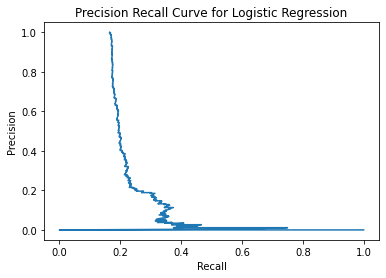

In [ ]:
# precision curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_)

# plot
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)
plt.plot(precision, recall)

plt.title('Precision Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()